In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nptyping==1.0.1
!pip install PyntCloud
!pip install pyvista
!pip install discretize
!pip install pymatsolver
!pip install SimPEG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 34.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 22.8 MB/s 
     |████████████████████████████████| 79.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.1 MB/s 
  Created wheel for discretize: filename=discretize-0.8.2-cp38-cp38-linux_x86_64.whl size=4228834 sha256=c7fd661fb4c4656263c523c869919a5bc8953956ed239988cd79327b0aadd1d8
  Stored in directory: /root/.cache/pip/wheels/02/40/1d/0c0a8a38d3c89c0a4e7882bd03332b020b42160392cc39c79b
Successfully built discretize
Looking i

In [ ]:
#!pip install -U tf-nightly

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [ ]:
use_tf_eager = False #@param {type:"boolean"}

# Use try/except so we can easily re-execute the whole notebook.
if use_tf_eager:
    try:
        tf.compat.v1.enable_eager_execution()
    except:
        pass
tf.compat.v1.enable_eager_execution()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

  
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
 
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.is_tensor(t) else t
             for t in tf.nest.flatten(tensors)])
    return sess.run(tensors)

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

def session_options(enable_gpu_ram_resizing=True, enable_xla=True):
    """
    Allowing the notebook to make use of GPUs if they're available.
    
    XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear 
    algebra that optimizes TensorFlow computations.
    """
    config = tf.compat.v1.ConfigProto()
    config.log_device_placement = True
    if enable_gpu_ram_resizing:
        # `allow_growth=True` makes it possible to connect multiple colabs to your
        # GPU. Otherwise the colab malloc's all GPU ram.
        config.gpu_options.allow_growth = True
    if enable_xla:
        # Enable on XLA. https://www.tensorflow.org/performance/xla/.
        config.graph_options.optimizer_options.global_jit_level = (
            tf.compat.v1.OptimizerOptions.ON_1)
    return config


def reset_sess(config=None):
    """
    Convenience function to create the TF graph & session or reset them.
    """
    if config is None:
        config = session_options()
    global sess
    tf.compat.v1.reset_default_graph()
    try:
        sess.close()
    except:
        pass
    sess = tf.compat.v1.InteractiveSession(config=config)
    
reset_sess()

Device mapping: no known devices.


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Thesis')

In [ ]:
import pandas as pd
import file

In [ ]:
print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Probability Version: ", tfp.__version__)

Tensorflow Version:  2.9.2
Tensorflow Probability Version:  0.17.0


In [ ]:
df_pinch_out = pd.read_csv('/content/drive/MyDrive/Thesis/pinch_out.csv')
cond = df_pinch_out['formation'] == 'rock1'
cond2 = df_pinch_out['formation'] == 'rock2'

layer_1_pinch_out = df_pinch_out[cond].iloc[:,0:-1].values.tolist()
layer_2_pinch_out = df_pinch_out[cond2].iloc[:,0:-1].values.tolist()

layer_1_pinch_out = np.array(layer_1_pinch_out).reshape(5, 3, 3)
layer_2_pinch_out = np.array(layer_2_pinch_out).reshape(5, 3, 3)
surface_pinch_out = [layer_1_pinch_out.tolist(), layer_2_pinch_out.tolist()]

In [ ]:
df_recumbent_fold = pd.read_csv('/content/drive/MyDrive/Thesis/recumbent_fold.csv')
cond = df_recumbent_fold['formation'] == 'layer_1'
cond2 = df_recumbent_fold['formation'] == 'layer_2'
layer_1_recumbent_fold = df_recumbent_fold[cond].iloc[:,0:-1].values.tolist()
layer_2_recumbent_fold = df_recumbent_fold[cond2].iloc[:,0:-1].values.tolist()
layer_1_recumbent_fold = np.array(layer_1_recumbent_fold).reshape(5, 11, 3)
layer_2_recumbent_fold = np.array(layer_2_recumbent_fold).reshape(5, 11, 3)
surface_recumbent_fold = [layer_1_recumbent_fold.tolist(), layer_2_recumbent_fold.tolist()]

In [ ]:
df_anticline = pd.read_csv('/content/drive/MyDrive/Thesis/anticline.csv')
cond = df_anticline['formation'] == 'layer_1'
cond2 = df_anticline['formation'] == 'layer_2'

layer_1_anticline = df_anticline[cond].iloc[:,0:-1].values.tolist()
layer_2_anticline = df_anticline[cond2].iloc[:,0:-1].values.tolist()

layer_1_anticline = np.array(layer_1_anticline).reshape(6, 3, 3)
layer_2_anticline = np.array(layer_2_anticline).reshape(6, 3, 3)
surface_anticline = [layer_1_anticline.tolist(), layer_2_anticline.tolist()]

In [ ]:
w = 1
data = file.read_data(surface_recumbent_fold, w)

In [ ]:
data_ = data.visualize_interactive(100, 100)

/usr/local/lib/python3.8/dist-packages/pyvista/plotting/plotting.py:131: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(


1.4870595932006836


In [ ]:
level = 5
# manifold = data.combine_mesh() # disaster
volumetrics = data.volumetric_mesh(level, 1)

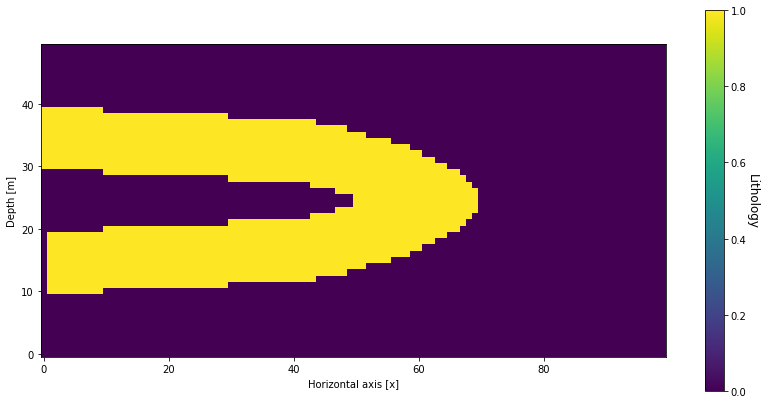

In [ ]:
volume_voxel = data.vol_voxelization_2()

In [ ]:
#sand_cloud = data.vol_viz()

In [ ]:
# For the Original data to calculate the likelihood
iteration = 50
lith_block_MC = data.gaussian_MC(100, 100, level, iteration)

In [ ]:
simulation = data.simulation()

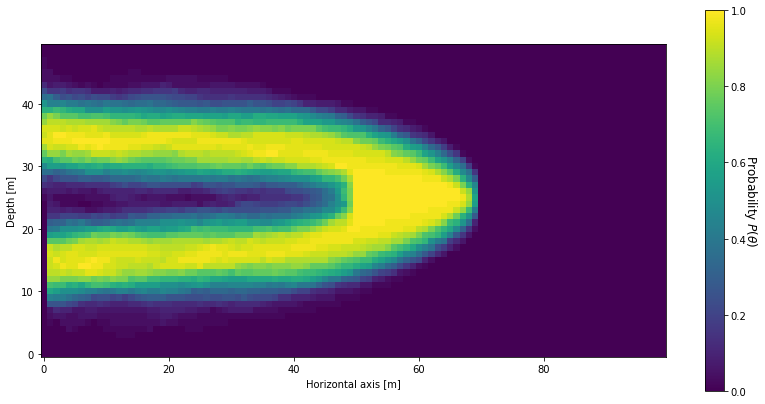

In [ ]:
probability = data.probability()

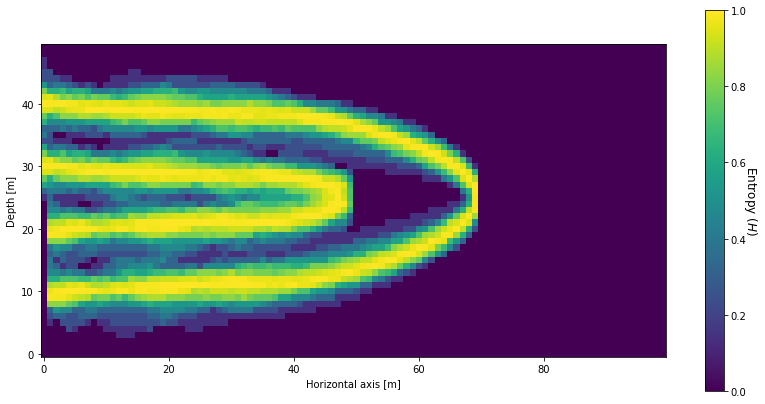

In [ ]:
entropy = data.entropy()

In [ ]:
#viz_gravity = data.visualize_geo()
#viz_gravity = data.visualize_geo_()

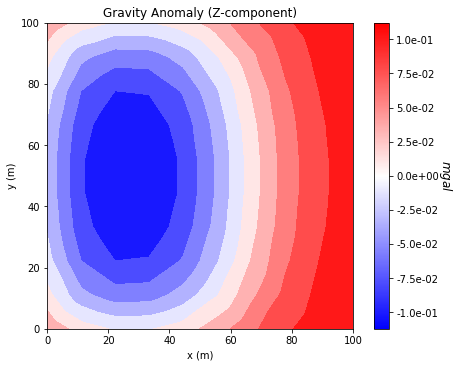

In [ ]:
viz_gravity = data.visualize_geo_final()

In [ ]:
# Prior distribution
iteration = 50
lith_block_MC = data.gaussian_MC_prior(100, 100, level, iteration)

In [ ]:
simulation = data.simulation()

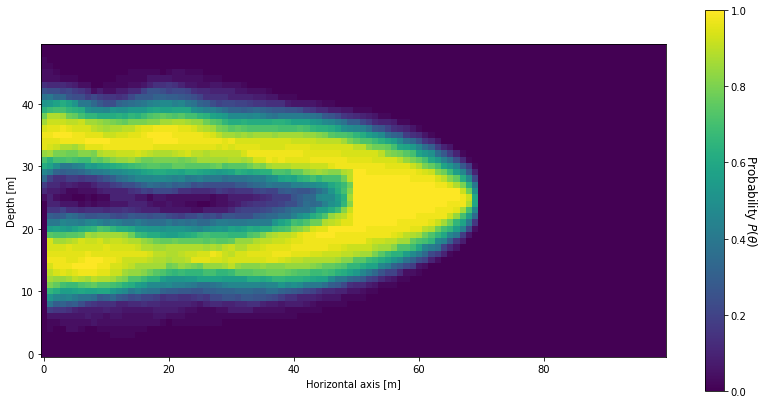

In [ ]:
probability = data.probability()

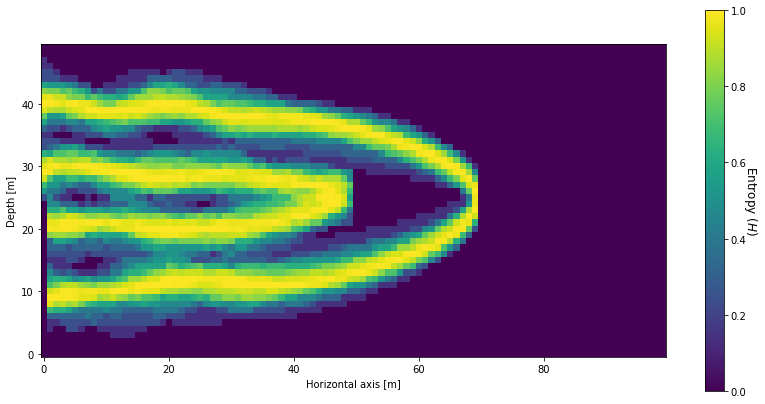

In [ ]:
entropy = data.entropy()

In [ ]:
sim_mcmc = data.gaussian_MCMC(level)

Device mapping: no known devices.
Error start


/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


... And then HERE!


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.8/dist-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Error end
Trace_Done, Nice!


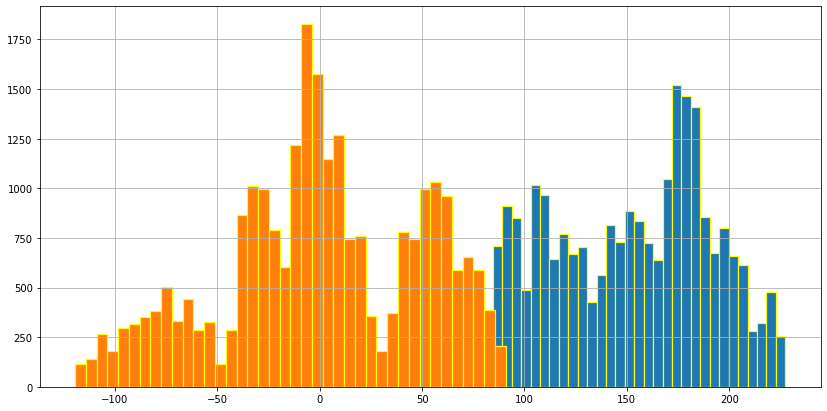

In [ ]:
t = data.plot_posterior_distribution()

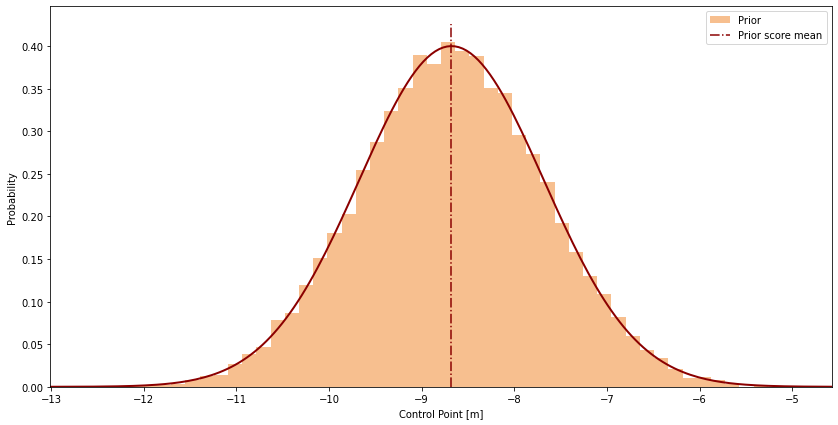

In [ ]:
r = data.prior_top()

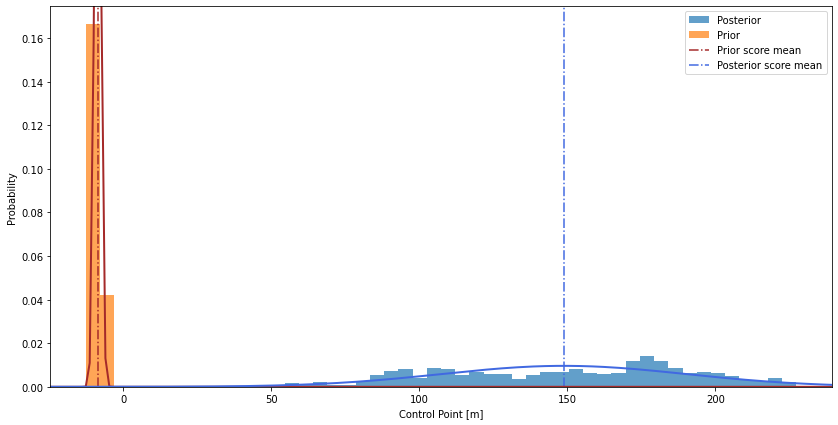

In [ ]:
compare = data.prior_posterior_top()

In [ ]:
map_ = data.MAP_model()

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


... And then HERE!


ValueError: ignored

In [ ]:
error_plot = data.error()

In [ ]:
map_sim = data.map_simulation()

In [ ]:
#probability = data.probability()

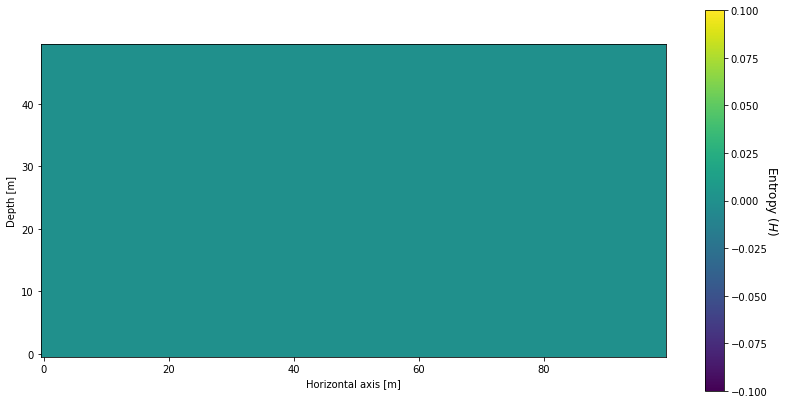

In [ ]:
#entropy = data.entropy()